In [76]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [48]:
from preamble import *
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
pdo = pd.read_csv('Data/PDO/data_PDO.csv')
duration = pd.read_csv('Data/computed-data/computed_annual-intensification-duration_JTWC.csv')
nino4 = pd.read_csv('Data/ENSO/Nino4/data_nino4.csv')

## Seasonal Regression (July-September)

In [15]:
season_nino4 = nino4[nino4['month'].between(7,9)].groupby('year')['nino4_anom'].mean().reset_index()
season_pdo = pdo[pdo['month'].between(7,9)].groupby('YEAR')['PDO'].mean().reset_index()

In [16]:
season_pdo.columns = ['year', 'pdo']

In [ ]:
variables = season_nino4.merge(season_pdo,on='year')

### Nino4 - Duration

Coefficients: [ 0.3488363]
Intercept   : 1.56352518103
Correlation : 0.599506


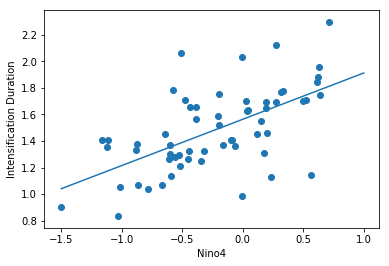

In [64]:
X_train = variables[['nino4_anom']].values
y_train = duration['Intensification Duration'].values

lr = LinearRegression().fit(X_train, y_train)

print("Coefficients: %s" % lr.coef_)
print("Intercept   : %s" % lr.intercept_)
print("Correlation : %f" % np.sqrt(lr.score(X_train, y_train)))

plt.scatter(X_train,y_train)
x = np.linspace(-1.5,1)
plt.plot(x, lr.coef_[0]*x + lr.intercept_)
plt.xlabel('Nino4')
plt.ylabel('Intensification Duration')
plt.show()

### Nino4 + PDO - Duration

Coefficients: [ 0.36081075 -0.0125117 ]
Intercept   : 1.56594979162
R2 Score    : 0.360521
Correlation : 0.600434


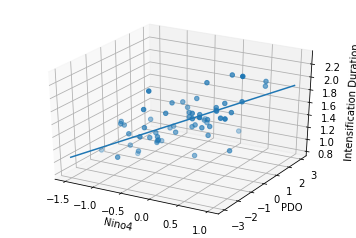

In [75]:
X_train = variables[['nino4_anom','pdo']].values
y_train = duration['Intensification Duration'].values

lr = LinearRegression().fit(X_train, y_train)

print("Coefficients: %s" % lr.coef_)
print("Intercept   : %s" % lr.intercept_)
print("R2 Score    : %f" % lr.score(X_train, y_train))
print("Correlation : %f" % np.sqrt(lr.score(X_train, y_train)))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0],X_train[:,1],y_train)
ax.set_zlabel('Intensification Duration')
ax.set_xlabel('Nino4')
ax.set_ylabel('PDO')
x = np.linspace(-1.5,1,10)
y = np.linspace(-3,3,10)
ax.plot(x,y,lr.coef_[0]*x+lr.coef_[1]*y+lr.intercept_)
plt.show()